# Smittemodellering

---

# Hensikt

Vi skal her lage en enkel "SIR-modell" for smittespredning under en epidemi, og undersøke tall fra begynnelsen av COVID-19-epidemien i Norge og hvordan tiltakene som ble gjort i mars 2020 påvirket antall smittede utover året.

---

# Teori

For modell 1 og 2 er følgende størrelser modellert:

* $S(t)$ = Antall personer som er mottakelige (kan bli smittet) ved dag $t$
* $I(t)$ = Antall personer som er syke og kan smitte andre ved dag $t$
* $R(t)$ = Antall personer som _har vært_ syke men som nå er friske ved dag $t$

Målet er å finne endringen til disse tre størrelsene, altså $S'(t)$, $I'(t)$ og $R'(t)$ slik at man kan sette noen startverdier og se på utviklingen derfra.

### Modell 1

Det gjøres noen antakelser i denne modellen:
* Antall personer i befolkningen N er konstant.
* Hver smittsomme person smitter $b \cdot S(t)$ mottakelige personer ved dag t.
* Hver dag vil en bestemt andel $a$ av de syke $I(t)$ bli friske.

($a$ og $b$ er vilkårlige konstanter)

Disse antakelsene gir noen likninger:

1. $$ S'(t) = -b \cdot S(t)I(t) $$
2. $$ R'(t)= a \cdot I(t) $$

Likning 1 kommer av antakelsen som sier at hver smittsomme person smitter $b \cdot S(t)$ mottakelige personer ved dag $t$. Altså: endringen i antall mottakelige per dag $S'(t)$ (antall nye smittede per dag) er lik antallet mottakelige personer som hver enkelt smittsomme person smitter per dag $b \cdot S(t)$, ganget med antall smittsomme personer $I(t)$.
Ettersom det er færre som kan bli smittet når tiden går, må $S'(t)$ være negativ. Derfor setter vi konstanten $b$ til å være negativ slik at den deriverte av $S(t)$ blir negativ.

Likning 2 sier at R-gruppen (gruppen med friskmeldte) vokser med $a \cdot I(t)$; en andel a av de syke $I(t)$ blir friske per dag $t$. Dette er den tredje antakelsen.

For å finne $I'(t)$ tar vi utgangsåunkt i følgende uttrykk:

$ S(t) + I(t) + R(t) = N $

Deriverer:

&#9; $ S'(t) + I'(t) + R'(t) = 0 $

Deretter isolerer man $I'(t)$:

$ I'(t) = - S'(t) - R'(t)$

$ I'(t) = - (- b \cdot S(t) \cdot I(t))-(a \cdot I(t)) $

&#9; $ I'(t) = b \cdot S(t) \cdot I(t)- a \cdot I(t) $

Det øverste uttrykket sier at antallet som __kan bli smittet__ + antallet som __er smittet__ + antallet som er __friske__ må til sammen bli __hele befolkningen__.
Og ut i fra det kan man utlede uttrykket for $I'(t)$.

---

### Modell 2

Her skal vi utvide modell 1 for å prøve å simulere en litt mer kompleks og kanskje litt mer realistisk situasjon.
Vi antar her at $b$-faktoren endrer seg over tid som beskrevet av følgende vilkårlige funksjon:

$$ b(t) = 2 \cdot 10^{-5}(t + 1)e^{-0,01t^{2}} $$


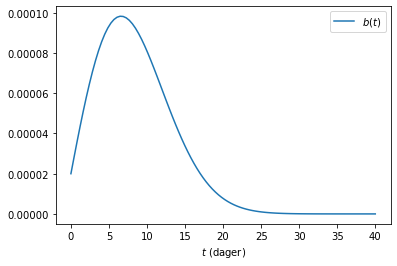

In [1]:
from pylab import *

def b(t):
    return 2 * 10**(-5) * (t + 1) * e**(-0.01 * t**2)

plot(t := linspace(0, 40, 100), b(t), label="$b(t)$")
xlabel("$t$ (dager)"); legend(); show()

$b$-faktoren (som påvirker hvor mange nye som blir smittet per dag per smittsomme person), er nå ikke lenger konstant som i modell 1, men vokser og synker med tiden. Man kan se hvordan $b$ utvikler seg i grafen over. Dette modellerer en annerledes sykdom enn i modell 1; Denne spres raskere og raskere, før den sakker ned og slutter å spre seg.

I tillegg gjør vi $a$-faktoren, som påvirker hvor mange som blir friske for hver dag, også om til en vilkårlig funksjon. Dette skal modellere en eksperimentell medisin som skal bremse spredningen av sykdommen. Den blir gitt til alle i populasjonen fra første dag, og begynner å virke etter fire dager.

$a$ defineres slik:

Dersom t &lt; 4:

&nbsp;&nbsp;&nbsp;&nbsp;$ a(t) = 0,2 $

ellers:

&nbsp;&nbsp;&nbsp;&nbsp;$ a(t) = 0,4 + 0,5 \cdot sin(0,6 \cdot \pi \cdot t) $


### Modell 3

Her skal vi modellere spredningen av COVID-19 i Norge, nærmere bestemt det totale antallet tilfeller siden 21. februar 2020 (da den første smittede i norge ble registrert).

Vi kan bruke data for kumulative tilfeller av COVID-19 i Norge fra Folkehelseinstituttet
(fra [denne siden på fhi.no](https://www.fhi.no/sv/smittsomme-sykdommer/corona/dags--og-ukerapporter/dags--og-ukerapporter-om-koronavirus/)).
Om vi så gjør polynomregresjon på tallene fra dagene før 13. mars, da drastiske tiltak ble innført, kan vi modellere veksten av antall tilfeller videre gitt at de nye smittevernsreglene ikke hadde blitt vedtatt.

---

# Resultater

### Modell 1

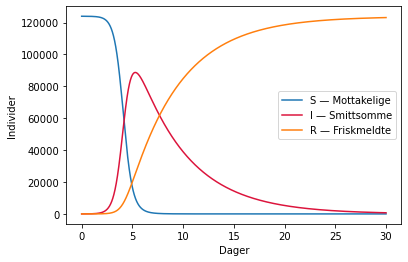

In [2]:
from pylab import *

I0 = 10     # Antall smittede ved start
a = 0.2     # Andel av smittede I som blir friske per dag
b = 2e-5    # Antall personer som hver enkelt smittsomme person smitter
N = 124_000 # Populasjon

t0 = 0      # Starttidspunkt
t_maks = 30 # Dager
dt = 1e-3   # Tidssteg

def S_der(S, I):
    return -b * S * I

def I_der(S, I):
    return b * S * I - a * I

def R_der(I):
    return a * I

# Startverdier
S = N - I0 # Mottakelige
I = I0     # Syke/smittsomme
R = 0      # Friskmeldte

# Lister for plotting av utvikling
S_list = [S]
I_list = [I]
R_list = [0]

t_list = [t0]

# Eulers metode
for t in arange(dt, t_maks + dt, dt):

    S = S + S_der(S, I) * dt
    I = I + I_der(S, I) * dt
    R = R + R_der(I) * dt

    S_list.append(S)
    I_list.append(I)
    R_list.append(R)

    t_list.append(t)

# Plotte S, I og R
plot(t_list, S_list, label="S — Mottakelige")
plot(t_list, I_list, label="I — Smittsomme", color="crimson")
plot(t_list, R_list, label="R — Friskmeldte")
xlabel("Dager")
ylabel("Individer")
legend(); show()

### Modell 2

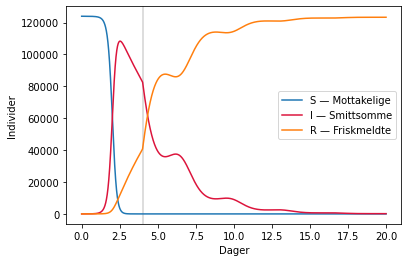

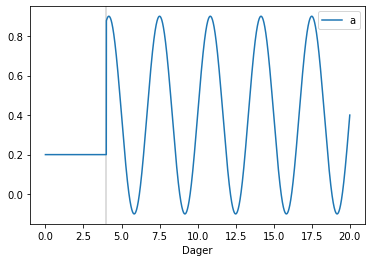

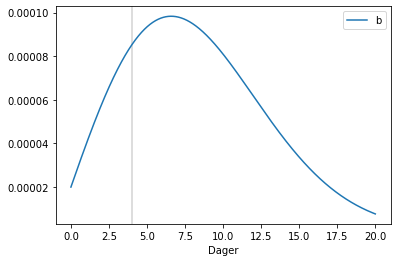

In [3]:
I0 = 10     # Antall smittede ved start
a = 0.2     # Andel av smittede I som blir friske per dag
b = 2e-5    # Antall personer som hver enkelt smittsomme person smitter
N = 124_000 # Populasjon

t0 = 0      # Starttidspunkt
t_maks = 20 # Dager
dt = 1e-3   # Tidssteg

def a(t):
    if t < 4:
        return 0.2
    return 0.4 + 0.5 * sin(0.6 * pi * t)

def b(t):
    return 2 * 10**(-5) * (t + 1) * e**(-0.01 * t**2)

def S_der(S, I, t):
    return -b(t) * S * I

def I_der(S, I, t):
    return b(t) * S * I - a(t) * I

def R_der(I, t):
    return a(t) * I

# Startverdier
S = N - I0 # Mottakelige
I = I0     # Syke/smittsomme
R = 0      # Friskmeldte

# Lister for plotting av utvikling
S_list = [S]
I_list = [I0]
R_list = [0]

t_list = [t0]

a_list = [a(t0)]
b_list = [b(t0)]


# Eulers metode
for t in arange(dt, t_maks + dt, dt):

    S = S + S_der(S, I, t) * dt
    I = I + I_der(S, I, t) * dt
    R = R + R_der(I, t) * dt

    S_list.append(S)
    I_list.append(I)
    R_list.append(R)

    t_list.append(t)
    
    a_list.append(a(t))
    b_list.append(b(t))


# Plotte S, I og R
axvline(4, color="lightgrey") # Vertikal linje på x = 4
plot(t_list, S_list, label="S — Mottakelige")
plot(t_list, I_list, label="I — Smittsomme", color="crimson")
plot(t_list, R_list, label="R — Friskmeldte")
xlabel("Dager")
ylabel("Individer")
legend(); show()

# Plotte a og b
axvline(4, color="lightgrey")
plot(t_list, a_list, label="a")
xlabel("Dager")
legend(); show()

axvline(4, color="lightgrey")
plot(t_list, b_list, label="b")
xlabel("Dager")
legend(); show()

### Modell 3

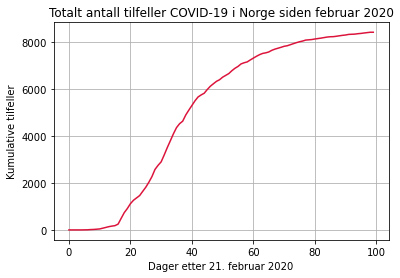

In [4]:
# Henter data om kumulative tilfeller COVID-19-smittede i Norge ved starten av pandemien
# (100 dager fra 21. feb 2020)
data = loadtxt("smittedata_2020_fhi.txt", skiprows=1)
tilfeller = data[:100,0]
dager = list(range(len(tilfeller)))

# Plotter data
plot(dager, tilfeller, color="crimson")

xlabel("Dager etter 21. februar 2020")
ylabel("Kumulative tilfeller")
title("Totalt antall tilfeller COVID-19 i Norge siden februar 2020")
grid(); show()

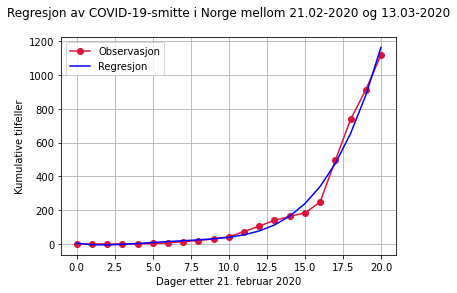

In [5]:
# Regresjonsanalyse av tidlige tilfeller

tidlige_tilfeller = data[:21,0] # Tall frem til 13. mars
tidlige_dager = list(range(len(tidlige_tilfeller)))

# Finner koeffisientene til regresjon av data (andregradspolynom)
koef = polyfit(tidlige_dager, tidlige_tilfeller, 4)

# Lager polynomuttrykk fra koeffisientene
polynom = poly1d(koef) 

# Lager array med y-verdier for regresjonen
regresjon = polynom(tidlige_dager)

plot(tidlige_dager, tidlige_tilfeller, color="crimson", marker="o", label="Observasjon")
plot(tidlige_dager, regresjon, color="blue", label="Regresjon")

xlabel("Dager etter 21. februar 2020")
ylabel("Kumulative tilfeller")
title("Regresjon av COVID-19-smitte i Norge mellom 21.02-2020 og 13.03-2020\n")
legend(); grid(); show()

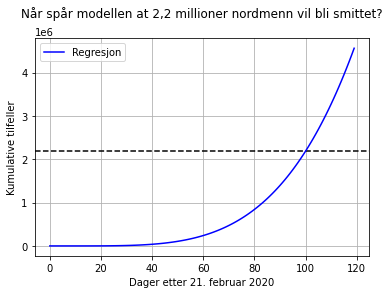

Ifølge regresjonen ville det gått rundt 100 dager etter 21. feb 2020 før 2,2 millioner nordmenn hadde blitt smittet


In [6]:
# Når spår regresjonen at 2,2 millioner nordmenn vil bli smittet?

fire_måneder = list(range(120))
regresjon_4_mnd = polynom(fire_måneder)

axhline(2_200_000, color="black", linestyle="--") # 2,2 millioner
plot(fire_måneder, regresjon_4_mnd, color="blue", label="Regresjon")

xlabel("Dager etter 21. februar 2020")
ylabel("Kumulative tilfeller")
title("Når spår modellen at 2,2 millioner nordmenn vil bli smittet?\n")
grid(); legend(); show()


for dag, tilfeller in enumerate(regresjon_4_mnd):
    if abs(tilfeller - 2_200_000) < 20_000:
        print(f"Ifølge regresjonen ville det gått rundt {dag} dager etter 21. feb 2020 før 2,2 millioner nordmenn hadde blitt smittet")
        break

---

# Diskusjon

### Modell 1

Resulatet viser at alle i populasjonen blir smittet, og at antallet som er syke på én gang stiger tilnærmet eksponensielt før det avtar og ender opp på null. Det er ikke nødvendigvis tilfellet for epidemier at hele populasjonen smittes for epidemien tar slutt, så det er ett av punktene hvor modellen ikke nødvendigvis beskriver virkeligheten nøyaktig.

For å videre vurdere validiteten til denne modellen kan man se på antakelsene som gjøres;

1. At populasjonen (inkludert eventuelt døde av sykdommen) er konstant.
2. Alle som er smittsomme på en gitt dag smitter like mange.
3. Hver dag vil en bestemt andel av de syke bli friske (eller dø :O ).
4. Har man er hatt sykdommen før kan man ikke bli smittet igjen.
5. Det skjer ingen endring i oppførsel/gjøres ingen tiltak for å begrense smittespredning.

Nummer 1 stemmer generelt ikke helt, men er en akseptabel forenkling som ikke påvirker resultatet drastisk.

Nummer 2 er derimot en ganske stor forenkling av virkeligheten. For sykdom som smitter gjennom kontakt mellom mennesker vil det naturligvis være store variasjoner mellom hvor mange hver smittsomme person smitter videre. For denne modellen bør se på det som at man med $b$-faktoren tar et gjennomsnitt, noe som gjør at man må ta resultatene med en liten klype salt.

Nummer 3 er, som nummer 2, en veldig forenkling. Igjen vil det være store variasjoner, siden folk vil takle sykdommen på forskjellige måter, og med $a$-faktoren tar man i praksis et slags gjennomsnitt.

Når det gjelder nummer 4 kommer det an på sykdommen for om antakelsen stemmer. Noen sykdommer kan man få flere ganger, andre ikke. For COVID-19 ser det ut som at man stort sett ikke pleier å få sykdommen flere ganger, så for det tilfellet er antakelsen helt akseptabel.

Nummer 5 er ganske urealistisk, siden det i dag er naturlig å prøve å begrense smittespredning. Det kan være enten ved nasjonale tiltak fra myndighetene, som regler for å begrense kontakt, eller bruk av medisiner/vaksiner. Denne modellen simulerer altså en uforhindret spredning av sykdommen, som jo ikke er særlig realistisk.

### Modell 2

Her tar vi utgangspunkt i modell 1, men prøver å modellere en litt mer kompleks og kanskje mer realistisk situasjon. Vi gjør for eksempel at sykdommen ikke har like lett for å spre seg hele tiden. Dette kan for eksempel forklares med sesongvariasjoner som påvirker spredningsevnen til sykdommen, eller kanskje som en effekt av smittevernstiltak. I tillegg endrer vi antakelse 3 fra den første modellen, ved å gjøre andelen som blir friske variabel også. Det for eksempel tilsvare en medisin som gis til folk.

I denne modellen virker ikke medisinen før etter fire dager, og før det er $a$ konstant og lavere enn i modell 1. Dette i kombinasjon med en økende $b$ fører til en raskere progresjon i forhold til modell 1; det er en sykdomstopp ved rundt 2,5 dager her vs. 5 dager i modell 1.

Etter fire dager, når medisinen begynner å virke, ser man hvordan den uten tvil påvirker situasjonen, men også hvordan det ikke akkurat er en braksuksess. Den går opp og ned; den bytter mellom å hjelpe flere til å bli friske og å føre til en _økning_ av antall syke (siden $a$ blir negativ).

### Modell 3

I denne modellen ser vi på kumulativt antall smittede fra de første ukene av COVID-19-epidemien i Norge. Regresjonen over dataene fra dagene før nedstengingen sier at om smittespredingen hadde fortsatt på samme måte, hadde 2,2 millioner nordmenn ha vært smittet av COVID-19 innen 100 dager fra det første tilfellet ble registrert, altså rundt starten av mai 2020. På starten av mai 2020 var det faktiske kumulative antallet smittede rundt 8000, altså mye lavere enn regresjonen. Det peker på at tiltakene som ble innført etter 13. mai har bidratt til å senke smittetallene svært mye.

Når det er sagt, må man også huske at denne modellen bare er en regresjon på et relativt lite datasett, som dekker en periode på bare 21 dager. Det er altså usikkert om gyldighetsområdet til modellen faktisk strekker seg helt til 100 dager.

---

# Konklusjon

Alle modellene vist her er ganske enkle matematiske representasjoner av virkeligheten, og kan derfor i liten grad brukes til å predikere fremtiden. De duger derimot til å gi et grovt innblikk i hvordan de forskjellige fasene til en epidemi kan se ut, med en gradvis økning før man når ett toppunkt antall syke, og så en nedgang fremt til alle til slutt blir immune mot sykdommen. Det er samtidig viktig å huske at ikke alle epidemier følger akkurat dette mønsteret, og det er en del forenklinger og antakelser som gjøres. Den siste modellen har et usikkert gyldighetsområde, men kan likevel brukes til å sannsynliggjøre at tiltakene som ble gjørt i mars 2020 førte til at en betydelig stor andel av Norges befolkning har unngått COVID-19-sykdommen.